In [1]:
from BioSeqDataset import BioSeqDataset
from SequenceAutoencoder import Autoencoder
import torch
import torch.nn as nn
import torch.optim as optim

In [12]:
# Example usage:
fastq_file = '../data_samples/FBA01901_barcode05.fastq'

In [10]:
import pykmertools as kt

In [4]:
print(kt.__doc__)

Pykmertools: kmertools python wrapper
Modules:
    OligoComputer      - computing oligonucleotide frequency vectors
                         from DNA sequences
    CgrComputer        - computing chaos game representations
                          for DNA sequences
    KmerGenerator      - an iterator object to generate k-mers
                         as (forward, reverse) numeric kmer tuples
    MinimiserGenerator - an iterator object to iterate minimisers
                         as (kmer, start, end) numeric minimiser tuples


In [5]:
from pykmertools import OligoComputer

In [13]:
dataset = BioSeqDataset(fastq_file)

In [14]:
dataset.raw_datasets

['ACTTCGTTTCGCTTAGTCGAGATGGGGATTTGTCATGCTTATTTAATTGCTAAAGTTTATAATATTAAATATTAAAAAATTATATTATTTAAAAATATAATAAAATTTA',
 'CATGAAGATCGTGCTAAGCTTTAGGGCCACCCGAGAGCAGGATCCATGAAGAGATCGTGCTAAGCTTTAGGGCCCCCCAAGAGCAGGATCCATGAAGACTTTCGTGCTAAGCTTTAGGGA',
 'TAGCAC',
 'GATCCATGAAGGGATCGTGCTAAGCTTTAGGGCCCGAGAGCAGGATCCATGAAGAGATCGTGCTAAGCTAGGTGCTGTTCTCGCAAAGGCAGAAAGTAGTCTTAACCTA',
 'TAAGCTTAGCACAATCTCATGATCCTGCTCTCGGCCCTAAAGCTTAGCACAATCTCATGGATCCATGAAGACCTTGTGCTAAGCTTTAGGGCCCCGAGAGCAGGATCCATGAAGATCAGTAGCTTTAGGGCCACCCGAGAGCAGGATCCCGAAGATCATG',
 'ATCCTGCTCTCGGCCCTAAAGCTTAGCACAAAGTATTCATGGATCCTGCTCTCGGCCCTAAAGCTTAGCACGATCTTCATGGATCCTGCTCTC',
 'AGCGCGAGGGCCGCGCCGATCAGGGCGAGGCCGGTTAAGGCGGTCAACGGGTAGAGCAGCCAGCGGAATTTGGAGAGCAAGAGGATGGGTTTCCGGAGGGTTTGAGGCCGAAAGTATAGCCGACCGACCGTGTGAAGCTTCTCGTTACGCCTACCCAA',
 'TCCTGCTCTCGGGTTCAGCGTATGTGGCCCTAAAGCTTAGCACGACTCTTCATGGATCCATGAAGCTCGTGCTAAGCTTTGAGGCCGAGAGCAGGATCCATGAAGATCGTGCTAAGCTTTAGGCCCAGAGCAGGATCCATGAAGATCGTGCTAAGCTTTAGGGCA',
 'TAAGGTTAGAGTTTCTCTTGCTTTGAGAACAGCACCTA

In [ ]:
oc = OligoComputer(100)
vectors = oc.vectorise_batch(dataset.raw_datasets)


In [218]:
dataset.print_sequence_length_stats()

Mean sequence length: 210.03481012658227
Standard deviation of sequence lengths: 118.32558296630943
Number of sequences: 2844
Number of filtered sequences: 2804


In [10]:
vocab = dataset.get_vocab()

In [220]:
print(dataset.get_vocab())
print(dataset.decode([1, 2, 3]))

{'G': 2, 'A': 3, 'C': 4, 'T': 5, '[PAD]': 0, '[UNK]': 1}
['[UNK]', 'G', 'A']


In [7]:
dataset.padded_data[0]

[2,
 5,
 3,
 5,
 3,
 3,
 4,
 5,
 5,
 4,
 2,
 5,
 5,
 4,
 2,
 2,
 5,
 5,
 3,
 4,
 2,
 5,
 2,
 5,
 2,
 4,
 5,
 3,
 3,
 2,
 2,
 5,
 5,
 3,
 5,
 5,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 4,
 2,
 3,
 5,
 3,
 3,
 3,
 5,
 4,
 2,
 3,
 3,
 4,
 3,
 2,
 4,
 3,
 4,
 4,
 5,
 2,
 2,
 5,
 2,
 4,
 5,
 2,
 5,
 5,
 4,
 2,
 2,
 3,
 5,
 5,
 4,
 5,
 3,
 5,
 4,
 2,
 5,
 2,
 5,
 5,
 4,
 4,
 5,
 3,
 5,
 5,
 3,
 3,
 4,
 5,
 3,
 2,
 4,
 3,
 3,
 5,
 3,
 4,
 3,
 5,
 3,
 5,
 3,
 2,
 4,
 5,
 4,
 2,
 2,
 5,
 3,
 5,
 5,
 3,
 4,
 5,
 5,
 4,
 2,
 5,
 5,
 4,
 3,
 2,
 5,
 5,
 3,
 4,
 2,
 5,
 3,
 5,
 5,
 2,
 4,
 5,
 3,
 3,
 2,
 2,
 5,
 5,
 3,
 3,
 4,
 4,
 5,
 2,
 2,
 5,
 3,
 3,
 4,
 5,
 2,
 2,
 2,
 3,
 4,
 3,
 4,
 3,
 3,
 2,
 3,
 4,
 5,
 4,
 3,
 2,
 4,
 3,
 4,
 4,
 5,
 3,
 3,
 2,
 2,
 5,
 5,
 3,
 3,
 4,
 4,
 4,
 5,
 2,
 2,
 5,
 3,
 3,
 4,
 5,
 2,
 2,
 2,
 3,
 4,
 5,
 3,
 4,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [221]:
from torch.utils.data import DataLoader

In [222]:
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [223]:
# Initialize the autoencoder model, loss function, and optimizer
input_dim = len(vocab) + 1  # +1 for padding token
embedding_dim = 10
model = Autoencoder(input_dim, embedding_dim, dataset.max_length)
print('AE model initialized')
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

AE model initialized


In [224]:
print('Start training...')
# Train the autoencoder model
for epoch in range(20):
    print('Epoch {}'.format(epoch))
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_data = batch['input']
        target_data = batch['target']
        optimizer.zero_grad()
        output = model(input_data)
        loss = criterion(output.view(-1, input_dim), target_data.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}')

Start training...
Epoch 0
Epoch 1, Loss: 0.7628066824241118
Epoch 1
Epoch 2, Loss: 0.5565864870494063
Epoch 2
Epoch 3, Loss: 0.5219041711904786
Epoch 3
Epoch 4, Loss: 0.5017301199788397
Epoch 4
Epoch 5, Loss: 0.4891481121832674
Epoch 5
Epoch 6, Loss: 0.4792128235779025
Epoch 6
Epoch 7, Loss: 0.4709139679643241
Epoch 7
Epoch 8, Loss: 0.4659350345080549
Epoch 8
Epoch 9, Loss: 0.4598311670124531
Epoch 9
Epoch 10, Loss: 0.45501466298645193
Epoch 10
Epoch 11, Loss: 0.4514078877188943
Epoch 11
Epoch 12, Loss: 0.44822138717228716
Epoch 12
Epoch 13, Loss: 0.44360941309820523
Epoch 13
Epoch 14, Loss: 0.44062349098649894
Epoch 14
Epoch 15, Loss: 0.43869237872687256
Epoch 15
Epoch 16, Loss: 0.43506053801287303
Epoch 16
Epoch 17, Loss: 0.43205179646611214
Epoch 17
Epoch 18, Loss: 0.43157666752284224
Epoch 18
Epoch 19, Loss: 0.4323069585317915
Epoch 19
Epoch 20, Loss: 0.43124120005152444


In [225]:
embeddings = []
with torch.no_grad():
    for ds in dataset.padded_data:
        input_data = torch.tensor(ds, dtype=torch.long).unsqueeze(0)  # Add a batch dimension
        encoded = model.encoder(input_data)
        embeddings.append(encoded.numpy().squeeze(0))

In [226]:
torch.save({
    'model_state_dict': model.state_dict(),
    'input_dim': input_dim,
    'embedding_dim': embedding_dim,
    'max_length': dataset.max_length
}, 'seq2vec_10dim.pth')

In [227]:
embeddings[0]

array([-10.528518 ,   3.0251095,  -5.4833946,  -0.5090766, -14.473343 ,
         1.9448723,  15.8897505, -20.577011 ,  24.582123 ,  10.213995 ],
      dtype=float32)

In [1]:
embeddings = []

with open("../data_samples/FBA01901_barcode05.vectors", "r") as f:
    for line in f:
        vector = [float(x) for x in line.strip().split(",")]
        embeddings.append(vector)

print(embeddings)

[[0.045082, 0.032787, 0.053279, 0.008197, 0.028689, 0.045082, 0.020492, 0.008197, 0.028689, 0.057377, 0.053279, 0.004098, 0.032787, 0.028689, 0.032787, 0.040984, 0.040984, 0.02459, 0.036885, 0.032787, 0.020492, 0.02459, 0.016393, 0.036885, 0.02459, 0.012295, 0.057377, 0.040984, 0.02459, 0.016393, 0.036885, 0.032787], [0.020161, 0.028226, 0.060484, 0.004032, 0.024194, 0.040323, 0.024194, 0.012097, 0.032258, 0.068548, 0.048387, 0.012097, 0.060484, 0.028226, 0.028226, 0.032258, 0.040323, 0.032258, 0.028226, 0.020161, 0.044355, 0.016129, 0.028226, 0.032258, 0.024194, 0.016129, 0.048387, 0.028226, 0.032258, 0.020161, 0.040323, 0.024194], [0.020747, 0.041494, 0.020747, 0.020747, 0.041494, 0.053942, 0.045643, 0.012448, 0.029046, 0.024896, 0.041494, 0.012448, 0.041494, 0.033195, 0.041494, 0.037344, 0.053942, 0.029046, 0.033195, 0.024896, 0.045643, 0.008299, 0.004149, 0.029046, 0.012448, 0.045643, 0.06639, 0.016598, 0.024896, 0.029046, 0.029046, 0.029046], [0.02807, 0.031579, 0.049123, 0.003509

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame({'sequences': dataset.raw_datasets, 'embeddings': embeddings})

In [13]:
df.to_pickle('seq_embeddings_10dim.pkl')

In [14]:
from compressor import HDBSCANClustering, HierarchicalClustering, KMeansClustering, OPTICSClustering, BIRCHClustering, MeanShiftClustering, GMMClustering, AffinityPropagationClustering, SpectralClusteringMethod, DBSCANClustering

In [15]:
clustering = HierarchicalClustering()
clusters = clustering.fit_predict(embeddings, 10)

In [16]:
clusters

array([5, 6, 0, ..., 4, 6, 5], dtype=int32)

In [17]:
df['clusters'] = clusters

In [18]:
df.head()

,sequences,embeddings,clusters
0,TTTTCTTCACTTCGTTCAGTTACGTATTGCTAAGGTTAAAAGGTTA...,"[0.045082, 0.032787, 0.053279, 0.008197, 0.028...",5
1,TATGTGGTGTTACTTCGTTCAGTTACGTATTGCTAAGGTTAAAAGG...,"[0.020161, 0.028226, 0.060484, 0.004032, 0.024...",6
2,TGTGTATACCTGACAGTTACGTATTGCTAAGGTTAAAAGGTTACAC...,"[0.020747, 0.041494, 0.020747, 0.020747, 0.041...",0
3,GTGTAACCTACTCGTTTCAGTTACGTATTGCTAAGGTTAAAAGGTT...,"[0.02807, 0.031579, 0.049123, 0.003509, 0.0245...",6
4,ATGTACTTGGTTCAGTTAGTATTGCTAAGGTTAAAAGGTTACACAA...,"[0.025641, 0.039886, 0.025641, 0.017094, 0.025...",1


In [19]:
df.groupby('clusters').count()

,sequences,embeddings
clusters,,
0,577,577
1,214,214
2,483,483
3,314,314
4,712,712
5,643,643
6,573,573
7,270,270
8,121,121


In [20]:
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Convert list of embeddings to array
X = np.vstack(df["embeddings"].values)
labels = df["clusters"].values

In [22]:
# Compute silhouette scores for all samples
silhouette_vals = silhouette_samples(X, labels)

In [23]:
# Add silhouette scores back to the DataFrame
df["silhouette"] = silhouette_vals

In [24]:
# Group by cluster and compute average silhouette score per cluster
cluster_silhouette = df.groupby("clusters")["silhouette"].mean().reset_index()
cluster_silhouette.columns = ["cluster", "average_silhouette"]


In [25]:
cluster_silhouette

,cluster,average_silhouette
0,0,0.020997
1,1,0.132712
2,2,0.061848
3,3,0.054506
4,4,-0.000654
5,5,0.065169
6,6,0.116379
7,7,0.497462
8,8,0.231902
9,9,0.029052


Cluster 0, length 577


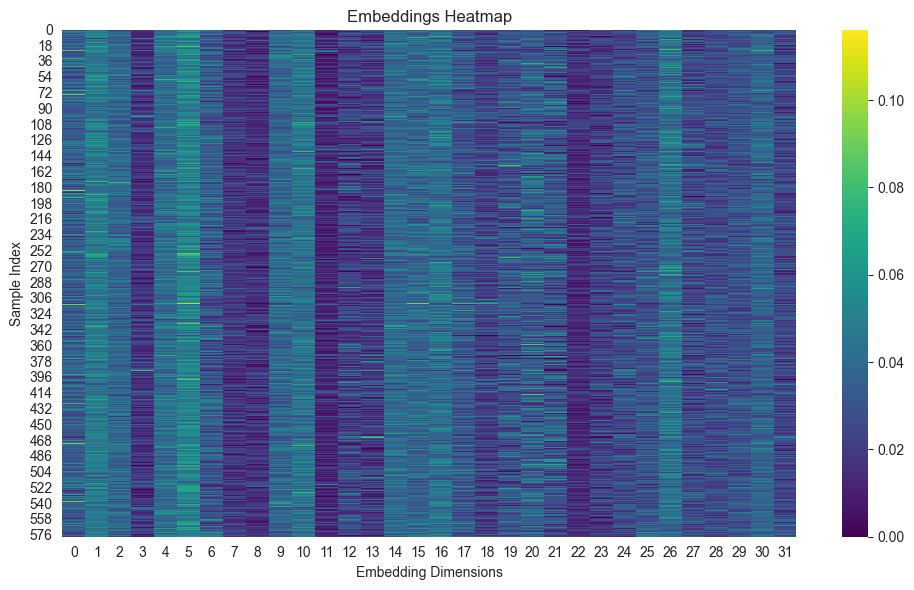

Cluster 1, length 214


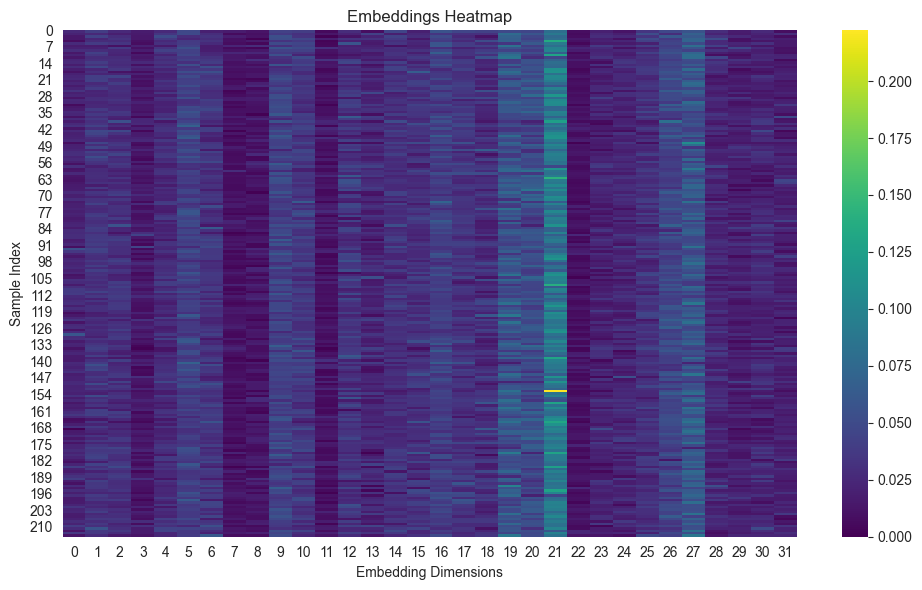

Cluster 2, length 483


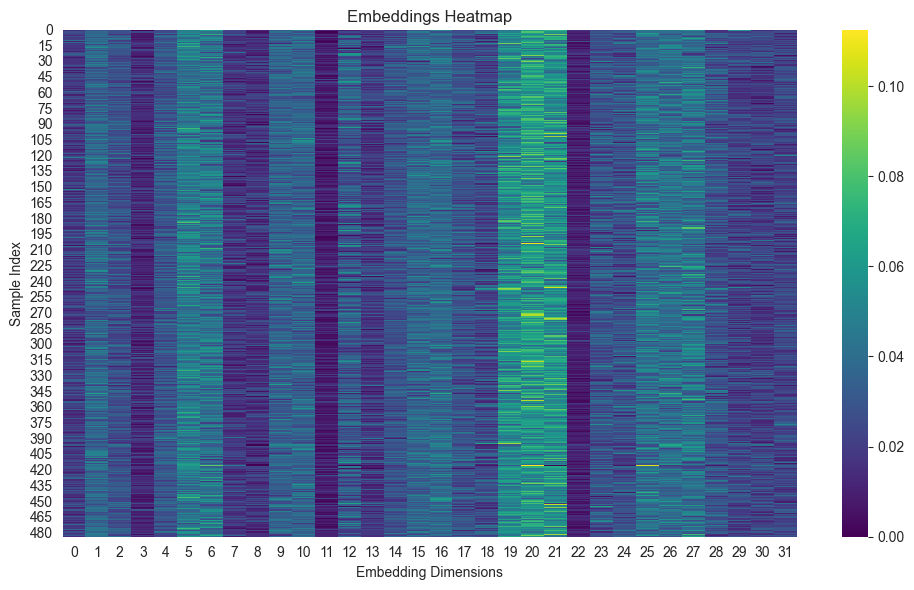

Cluster 3, length 314


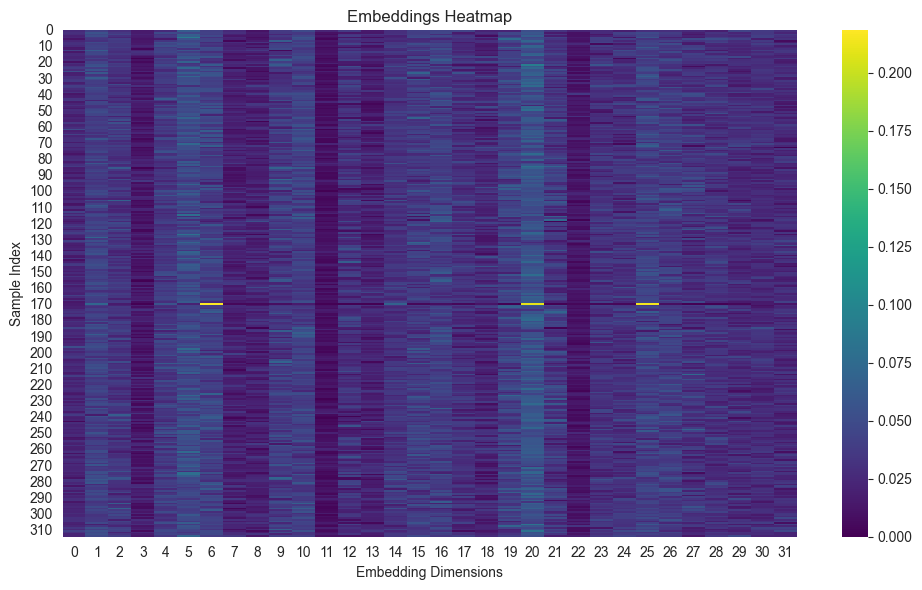

Cluster 4, length 712


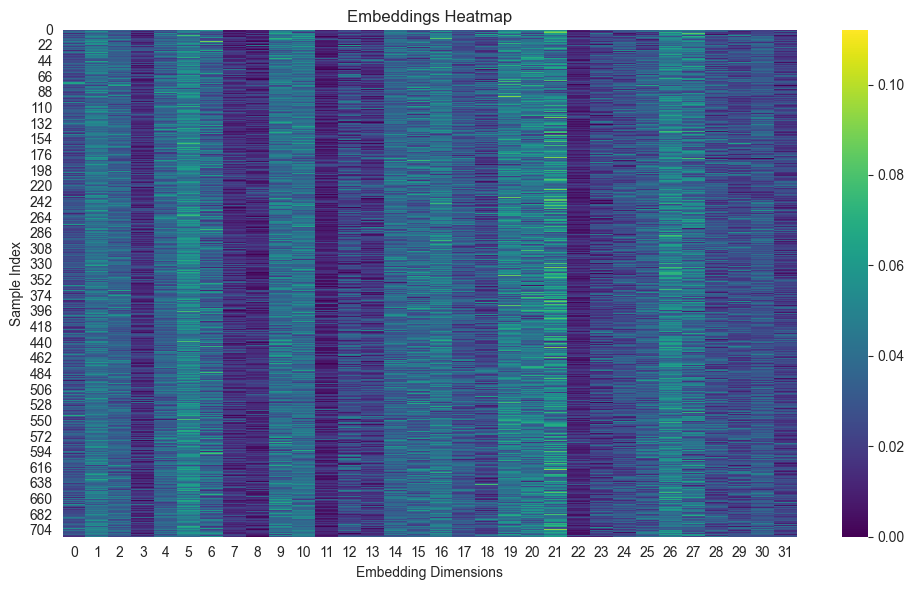

Cluster 5, length 643


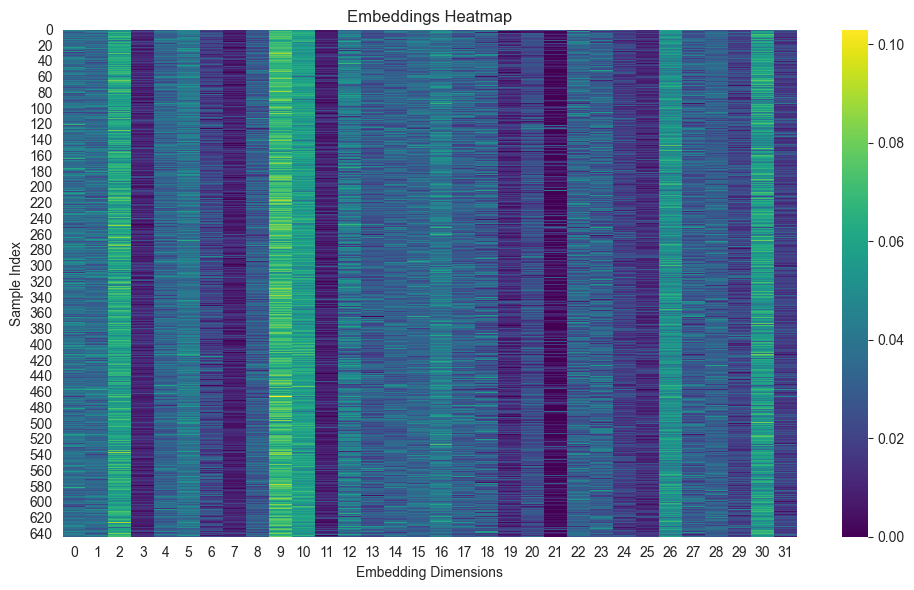

Cluster 6, length 573


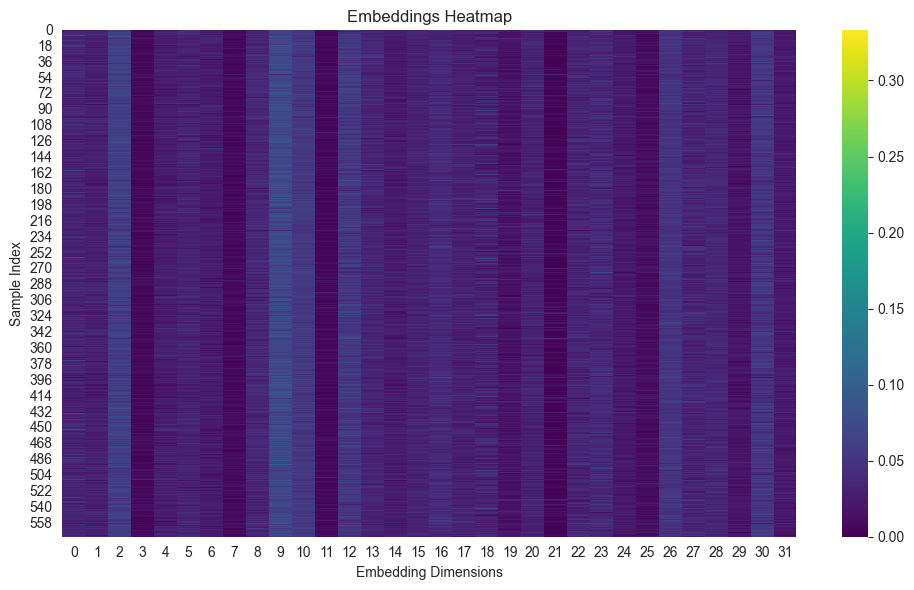

Cluster 7, length 270


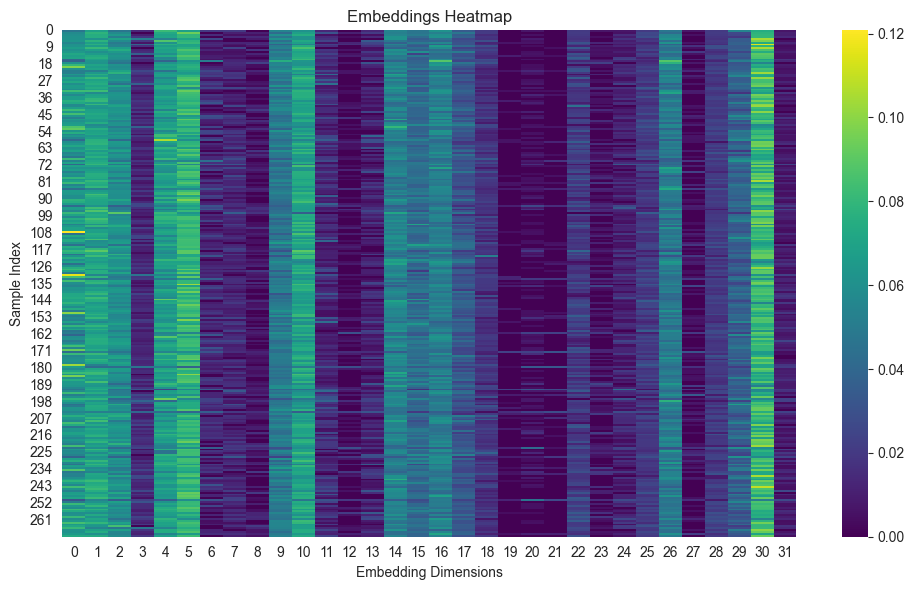

Cluster 8, length 121


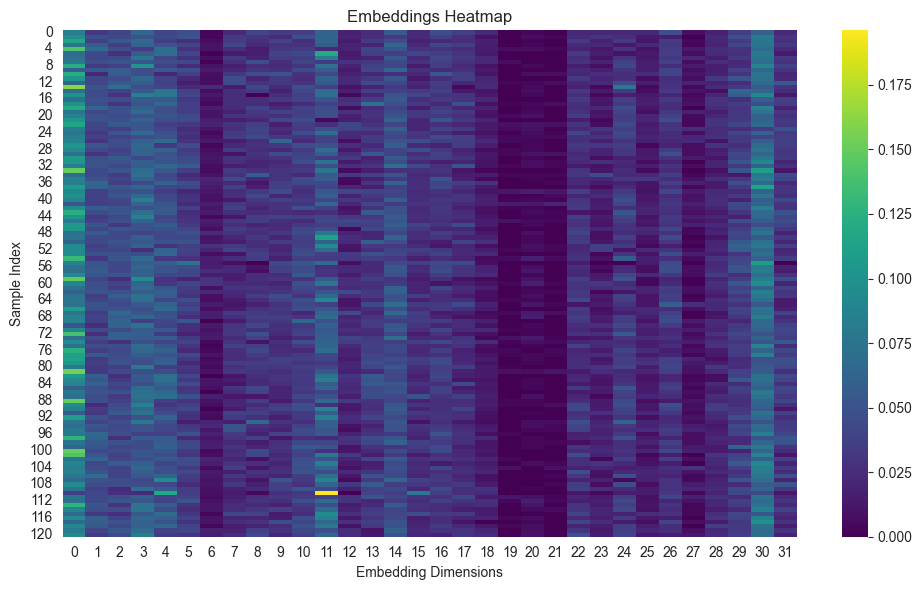

Cluster 9, length 161


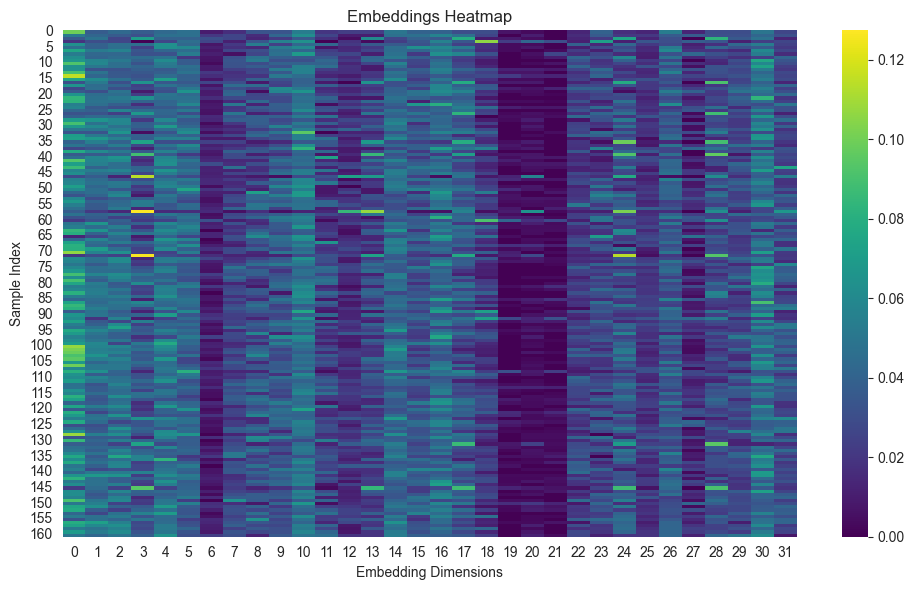

In [26]:
for idx, cluster in df.groupby('clusters'):
    print(f'Cluster {idx}, length {cluster.shape[0]}')
    embeddings_array = np.array(cluster['embeddings'].tolist())
    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(embeddings_array, annot=False, cmap="viridis", cbar=True)
    
    # Customize axes
    plt.title("Embeddings Heatmap")
    plt.xlabel("Embedding Dimensions")
    plt.ylabel("Sample Index")
    plt.tight_layout()
    plt.show()

In [58]:
big_cluster = df[df['clusters'] == 1]

In [59]:
big_cluster.head()

,sequences,embeddings,clusters
5,ACTTCGTTCAGTTACGTATTGCTAAGGTTAATGAGGGAAACACGAT...,"[3.2919564, 18.913326, -5.2245173, 7.492614, 1...",1
7,ATTAATACTTCGTTCCAGTTACATGTTACTAAGGTTAATAGGAAAC...,"[16.291992, 11.609262, 2.8756814, 14.714933, 5...",1
19,CATTTGCTTCCGTTCCAGTTACGTATTGCTAGGTTAGCGGGGAAGC...,"[10.440616, 15.926019, -2.4637103, 8.659835, -...",1
25,CGTGTACTTCGTTCCAGTTACGTATTGCTAAGGTTAATGAGGAAAC...,"[6.2434015, 22.873781, 1.8044983, -5.5761533, ...",1
30,ATTGTACTTCGTTCAGTTACGTATTGCTAGTTAGCTAGGGAAACAC...,"[22.460117, 19.15322, 2.7531838, -10.827773, 5...",1


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [85]:
# Convert to NumPy array for easy manipulation
embeddings_array = np.array(df['embeddings'].tolist())

In [86]:
embeddings_array

array([[  5.772205 , -11.7015505,  -7.2327247, ...,  16.979809 ,
         14.271623 , -17.931673 ],
       [ 14.602868 ,  -6.471068 , -10.1409645, ..., -14.0111885,
        -14.522492 ,  14.743793 ],
       [  2.285532 ,   3.6226573, -12.597566 , ..., -18.216255 ,
         -4.0830107,  24.905235 ],
       ...,
       [-13.125107 , -19.644932 ,  -6.1128955, ...,  -1.042589 ,
         -1.7308198,   0.3846042],
       [  4.7881594,   9.226816 ,  -5.2363877, ...,  -5.7450423,
         -4.785432 ,  19.19532  ],
       [ -7.6201825,  19.629316 ,   8.247995 , ...,   6.8765545,
         14.262867 ,  -1.4668896]], dtype=float32)

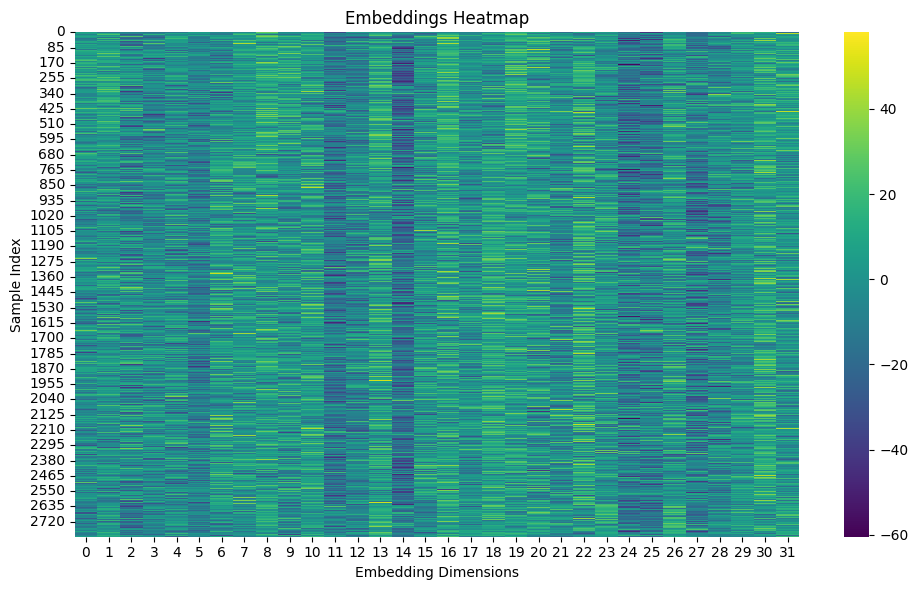

In [87]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(embeddings_array, annot=False, cmap="viridis", cbar=True)

# Customize axes
plt.title("Embeddings Heatmap")
plt.xlabel("Embedding Dimensions")
plt.ylabel("Sample Index")
plt.tight_layout()
plt.show()

In [71]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import random

In [79]:
n_records = 0 
unique_id_counter = 1
seq_records = []

for index, record in enumerate(big_cluster['sequences'].values):
    n_records += 1
    # Create a new FASTQ record
    random_quality = [random.randint(20, 40) for _ in range(len(record))]  # typical high-quality range
    print(random_quality)
    
    new_record = SeqRecord(
        record,
        id=str(unique_id_counter),
        description="",
        letter_annotations={"phred_quality": random_quality}
    )

    seq_records.append(new_record)
    unique_id_counter += 1

print(f'Selected records: {len(seq_records)}')
print(f'Number of records: {n_records}')


[31, 35, 22, 28, 33, 40, 21, 26, 36, 31, 35, 36, 35, 25, 34, 28, 28, 23, 30, 24, 30, 22, 22, 25, 32, 28, 30, 32, 24, 22, 22, 20, 29, 36, 38, 29, 36, 32, 22, 27, 22, 25, 37, 36, 38, 26, 38, 21, 34, 28, 34, 20, 33, 35, 22, 20, 30, 21, 23, 36, 39, 34, 31, 33, 35, 37, 31, 36, 38, 23, 38, 36, 29, 27, 36, 39, 35, 25, 38, 30, 40, 25, 35, 35, 22, 35, 34, 30, 30, 34, 25, 35, 23, 27, 34, 39, 21, 32, 27, 30, 36, 37, 26, 36, 29, 29, 34, 38, 29, 23, 38, 36, 33, 24, 29, 39, 37, 36, 37, 22, 22, 28, 33, 29, 20, 39, 22, 25, 28, 27, 28, 29, 25, 27, 21, 38, 25, 32, 29, 36, 25]
[25, 21, 23, 27, 30, 36, 33, 38, 34, 29, 35, 32, 25, 20, 29, 39, 22, 26, 35, 34, 40, 33, 32, 33, 31, 33, 23, 26, 20, 36, 30, 38, 22, 37, 20, 28, 31, 29, 24, 30, 30, 27, 36, 22, 25, 33, 35, 32, 36, 25, 32, 27, 33, 40, 20, 40, 25, 20, 34, 39, 26, 35, 34, 35, 37, 32, 30, 31, 30, 30, 21, 33, 20, 23, 22, 36, 40, 28, 24, 30, 27, 27, 38, 24, 20, 36, 33, 38, 33, 26, 25, 40, 24, 31, 22, 30, 39, 26, 35, 24, 23, 22, 21, 34, 23, 27, 21, 31, 31

In [82]:
seq_records

[SeqRecord(seq=Seq('ACTTCGTTCAGTTACGTATTGCTAAGGTTAATGAGGGAAACACGATAAGTCGAA...CAA'), id='1', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('ATTAATACTTCGTTCCAGTTACATGTTACTAAGGTTAATAGGAAACACATTAGA...CAA'), id='2', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CATTTGCTTCCGTTCCAGTTACGTATTGCTAGGTTAGCGGGGAAGCACGATAGA...TGG'), id='3', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CGTGTACTTCGTTCCAGTTACGTATTGCTAAGGTTAATGAGGAAACACGATAAA...AAC'), id='4', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('ATTGTACTTCGTTCAGTTACGTATTGCTAGTTAGCTAGGGAAACACGATAGAAT...CAT'), id='5', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('AATTGTATACAAGTTTCAATTTTTTGTATTGCTAAGGTTAATAAGAGGAAGCGA...CTT'), id='6', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CGTGTACTTCGTTCAGTTACGTATTGCTAAGGTTAATAGGGAAACACATTAAGT...ATG'), id='7', name='<unknown name>', description='', dbxre

In [81]:
# Save filtered sequences in FASTQ format
with open('big_cluster.fastq', 'w') as outfile:
    SeqIO.write(seq_records, outfile, "fastq")